## Teoría de Comunicaciones y DSP

## Laboratorio #2

## Integrantes:

### Andrés Jiménez Mora
### Castalia Leiva Cordero

## Se comienza con la importación de librerías

In [ ]:
#Importación de librerías
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz

# Tarea 1

## Bloque de modulación

Para modular se implementó una función llamada modulacion(moduladro, carrier). Tiene como parámetros de entrada la función moduladora o información y la señal de portadora. Como salida retorna la onda modulada. Esta función realiza la modulación dadas las 2 señales de entrada, utiliza la FFT (Fast Fourier Transformation) para pasar al dominio de la frecuencia y grafica todas las señales involucradas en ambos dominios.

In [ ]:
#Bloque de modulación
def modulacion_1(moduladora, carrier):
    
    #Modulación
    s = moduladora*carrier
    
    #Pasa al dominio de la frecuencia mediante la transformada rápida de Fourier
    
    #Señal moduladora
    n1 = len(moduladora)
    mod_f = (scipy.fft.fft(moduladora))/(n1)  #normaliza la función
    mod_ff = mod_f[range(int(n1/2))]
    k1 = np.arange(n1)
    T1 = n1/Fs
    frq_mod = k1/T1
    fqr1_mod = 1000*frq_mod[range(int(n1/2))] 

    #Señal de portadora
    n2 = len(carrier)
    carr_f = (scipy.fft.fft(carrier))/(n2)  #normaliza la función
    carr_ff = carr_f[range(int(n2/2))]
    k2 = np.arange(n2)
    T2 = n2/Fs
    frq_carr = k2/T2
    fqr1_carr = 1000*frq_carr[range(int(n2/2))] 
    
    
    #Señal modulada
    n3 = len(s)
    s_f = (scipy.fft.fft(s))/(n3)  #normaliza la función
    s_ff = s_f[range(int(n3/2))]
    k3 = np.arange(n3)
    T3 = n3/Fs
    frq_s = k3/T3
    fqr1_s = 1000*frq_s[range(int(n3/2))] 
    
    #Imprime la señal moduladora en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal moduladora')
    
    ax1.plot(x,moduladora)
    
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_mod,abs(mod_ff))
    
    # nombre de los ejes
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    
    print("PROCESO DE MODULACIÓN")
    
    #Imprime la señal de portadora en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal de portadora')
    
    ax1.plot(x,carrier)
    
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_carr,carr_ff)
    
    # nombre de los ejes
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    
    #Imprime la señal modulada en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal modulada')
    
    ax1.plot(x,s)
    
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_s,s_ff)
    
    # nombre de los ejes
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
      
    return s


## Filtro paso bajo

Se define un filtro paso bajo para realizar el proceso de demodulación. Tiene como parámetros de entrada la frecuencia de corte, la frecuencia de muestreo y el orden del filtro. Como salida retorna los coeficientes a y b necesarios para realizar el filtrado de los datos.

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  #Frecuencia de Nyquist
    normal_cutoff = cutoff / nyq  #Frecuencia de corte
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

## Bloque de demodulación

Para demodular se implementó una función llamada demodulacion(modf, carrier). Tiene como parámetros de entrada la señal modulada y la señal de portadora que se utiliza en modulación. Como salida retorna la señal recuperada. Esta función realiza la demodulación dadas las 2 señales de entrada y posteriormente aplica un filtro paso bajo a un frecuencia de corte de 80 Hz. Además, utiliza la FFT (Fast Fourier Transformation) para pasar al dominio de la frecuencia y grafica todas las señales involucradas en ambos dominios.

In [12]:
def demodulacion_1(modf, carrier):
    
    mod = modf*carrier #Demodulación
    
    #Filtro paso bajo
    order=5
    b, a = butter_lowpass(80, Fs, order=order)   #Configuration filter 5 representa el orden del filtro
    filted_mod = 2*(lfilter(b, a, mod)) - offset
    
    #Pasa al dominio de la frecuencia mediante la transformada rápida de Fourier
    
    #Señal recuperada
    n1 = len(filted_mod)
    filted_mod_f = (scipy.fft.fft(filted_mod))/n1
    filted_mod_ff = filted_mod_f[range(int(n1/2))]
    k1 = np.arange(n1)
    T1 = n1/Fs
    frq_filted_mod = k1/T1
    fqr1_filted_mod = 1000*frq_filted_mod[range(int(n1/2))] 
    
    #Señal de portadora
    n2 = len(carrier)
    carr_f = (scipy.fft.fft(carrier))/n2
    carr_ff = carr_f[range(int(n2/2))]
    k2 = np.arange(n2)
    T2 = n2/Fs
    frq_carr = k2/T2
    fqr1_carr = 1000*frq_carr[range(int(n2/2))] 
    
    #Señal modulada
    n3 = len(modf)
    s_f = (scipy.fft.fft(modf))/n3
    s_ff = s_f[range(int(n3/2))]
    k3 = np.arange(n3)
    T3 = n3/Fs
    frq_s = k3/T3
    fqr1_s = 1000*frq_s[range(int(n3/2))] 
    
    print("PROCESO DE DEMODULACIÓN")
    
    
    #Imprime la señal de portadora en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal de portadora')
    
    ax1.plot(x,carrier)
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_carr,carr_ff)
    # nombre de los eje
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    
    #Imprime la señal modulada en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal modulada')
    
    ax1.plot(x,modf)
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_s,s_ff)
    # nombre de los eje
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    
    #Imprime la señal recuperada en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal recuperada')
    
    ax1.plot(x,filted_mod)
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_filted_mod,filted_mod_ff)
    # nombre de los eje
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    
    

In [13]:
#Variables globales para la modulación, demodulación y transformada de Fourier
Fs = 1000   #Frecuencia de muestreo
Ts = 1/Fs 
x = np.arange(0,1,Ts)
fm = 3000
fc = 100000
Ac = 1 
offset = 0
mod1 = offset+np.cos(2 * (3.141592) * (fm/1000) * x)   #Onda moduladora (tono)
carr = Ac*np.cos(2 * (3.141592) * (fc/1000) * x)   #Onda de portadora

### Modulación

PROCESO DE MODULACIÓN


C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


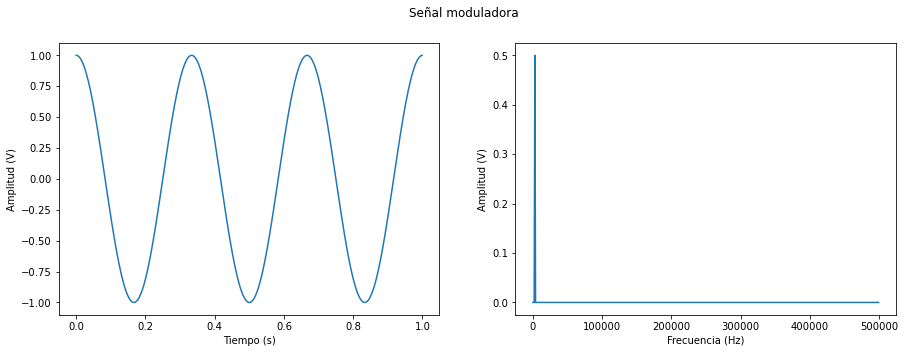

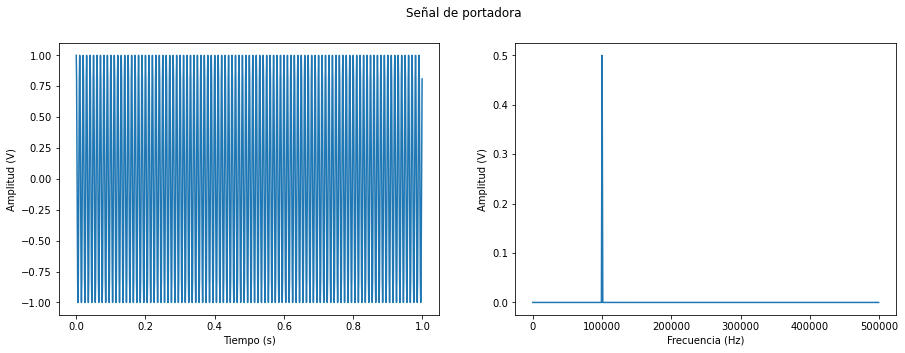

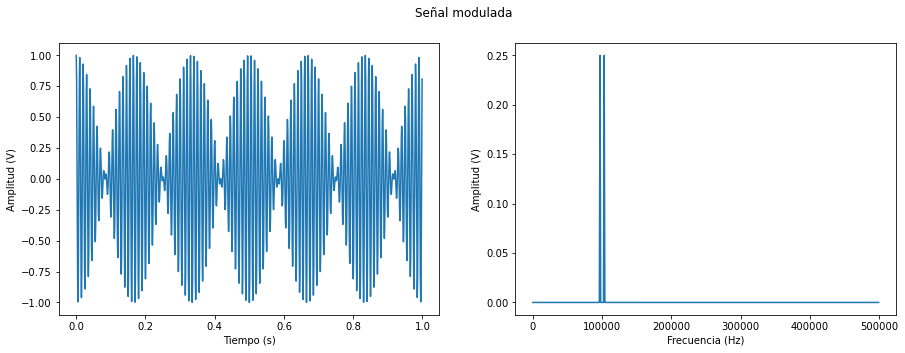

In [14]:
modf = modulacion_1(mod1,carr)   #Onda modulada

### Demodulación

PROCESO DE DEMODULACIÓN


C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


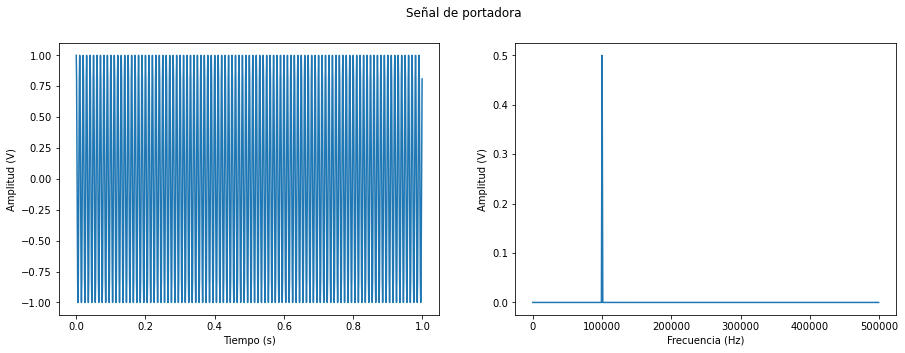

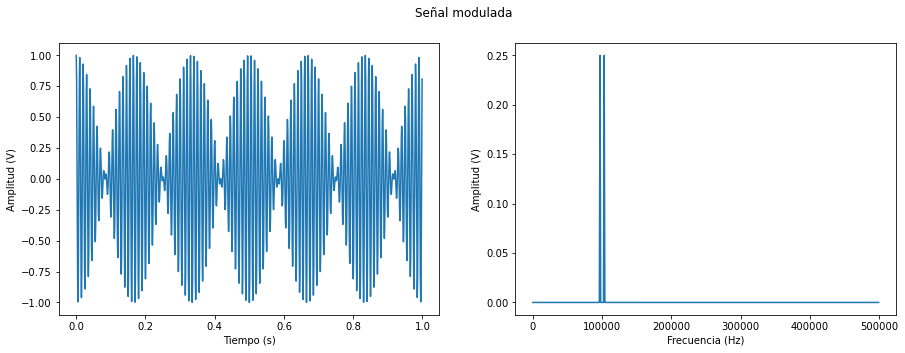

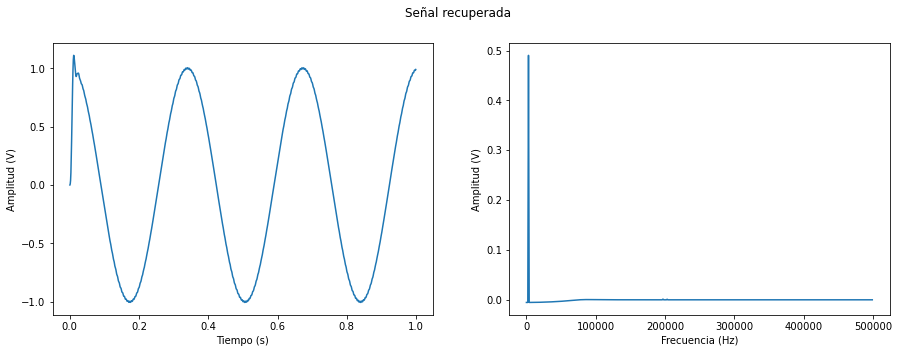

In [15]:
mod = demodulacion_1(modf,carr)       #Onda recuperada

### Análisis de resultados

Para el bloque de modulación, se puede notar que la señal de información se modula correctamente y que presenta un cambio de fase, sin embargo, esto se detecta y se corrije en el bloque siguiente. Sobre el dominio de la frecuencia, se puede notar que la señal modulada tiene una amplitud de un Ac/4, que es lo esperado para una multiplicación de 2 señales cosenoidales y la frecuencia corresponde a una banda lateral inferior y una banda lateral superior, centradas en la frecuencia de la portadora (frecuencia de corte). En cuanto, a la demodulación, se puede notar que la señal se recuperó correctamente con una pequeña incongruencia al inicio de la onda, estos se puede deber a la etapa de filtrado. Sobre el dominio de la frecuencia, en la señal recuperada se puede apreciar que tiene la componente de frecuencia original con una amplitud esperada de Ac/2 y que el filtrado eliminió las bandas de frecuencia no deseadas.

# Tarea 2

Se redefine la función de demodulacion() para poder introducir y gráficar solamente las señales de interés.

In [19]:
def demodulacion_Error(modf, carrier):
    
    mod = modf*carrier #Demodulación
    
    #Filtro paso bajo
    order=5
    b, a = butter_lowpass(80, Fs, order=order)   #Configuration filter 5 representa el orden del filtro
    filted_mod = 2*(lfilter(b, a, mod)) - offset
    
    #Pasa al dominio de la frecuencia mediante la transformada rápida de Fourier
    
    #Señal recuperada
    n1 = len(filted_mod)
    filted_mod_f = (scipy.fft.fft(filted_mod))/n1
    filted_mod_ff = filted_mod_f[range(int(n1/2))]
    k1 = np.arange(n1)
    T1 = n1/Fs
    frq_filted_mod = k1/T1
    fqr1_filted_mod = 1000*frq_filted_mod[range(int(n1/2))] 
    
    #Imprime la señal recuperada en dominio de tiempo y frecuencia
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    fig.suptitle('Señal recuperada')
    
    ax1.plot(x,filted_mod)
    # nombre de los ejes
    ax1.set(xlabel='Tiempo (s)',ylabel='Amplitud (V)')
    
    ax2.plot(fqr1_filted_mod,filted_mod_ff)
    # nombre de los eje
    ax2.set(xlabel='Frecuencia (Hz)',ylabel='Amplitud (V)')
    

Se modula un tono para realizar el experimento:

PROCESO DE MODULACIÓN


C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


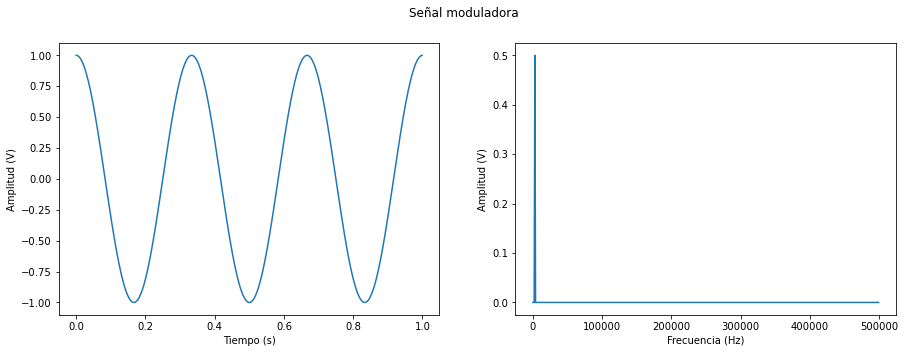

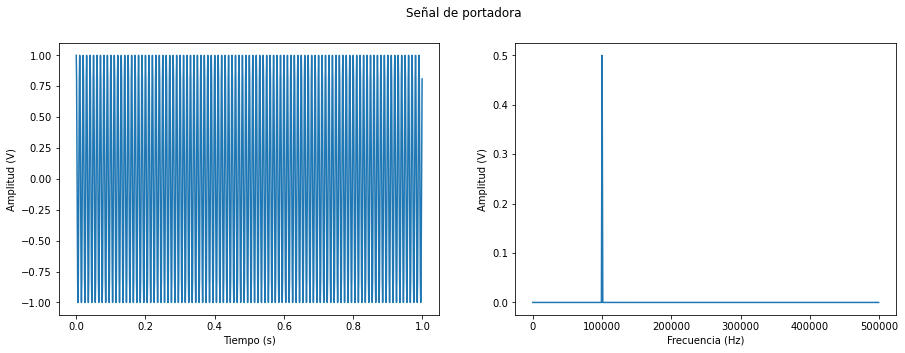

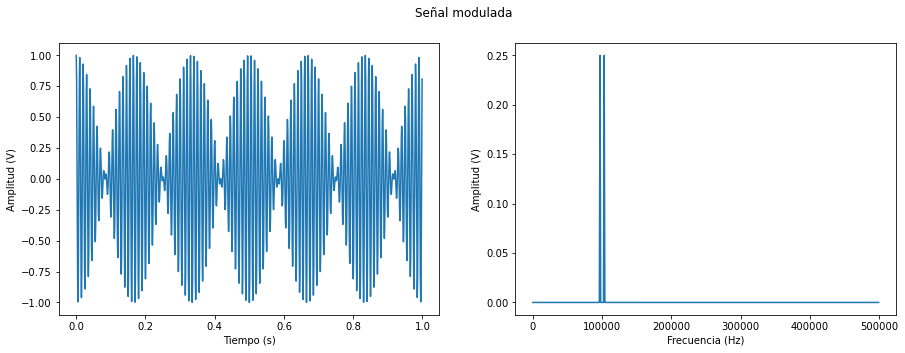

In [25]:
modfe = modulacion_1(mod1,carr)   #Onda modulada

Se define una nueva carrier para el demodulador de forma que se puedan introducir errores de frecuencia y de fase. Los primeros experimentos se realizarán manteniendo el error de frecuencia en cero y introduciendo varios errores de fase. Posteriormente, se mantendrán los errores de fase en cero y se introducirán varios errores de frecuencia.

### Error de fase de 30° o pi/6

In [29]:
delta_w = 0    #Error de frecuencia en Hz
phase = (3.141592)/6    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


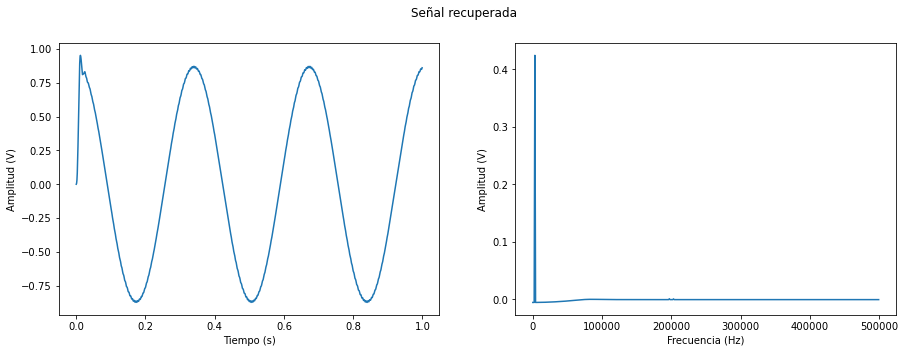

In [30]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de fase de 45° o pi/4

In [31]:
delta_w = 0    #Error de frecuencia en Hz
phase = (3.141592)/4    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


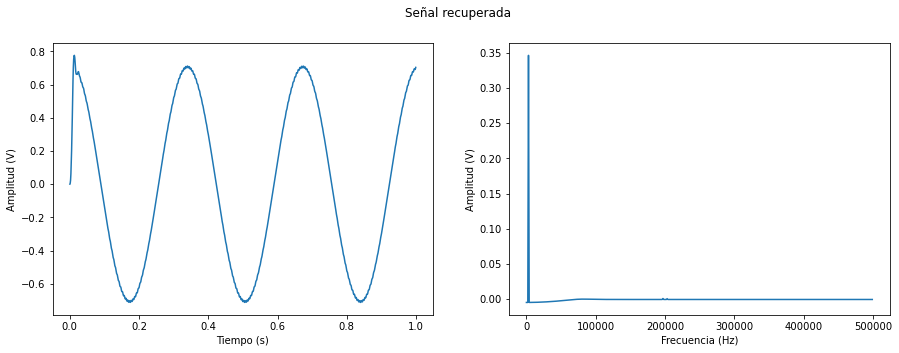

In [32]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de fase de 60° o pi/3

In [33]:
delta_w = 0    #Error de frecuencia en Hz
phase = (3.141592)/3    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


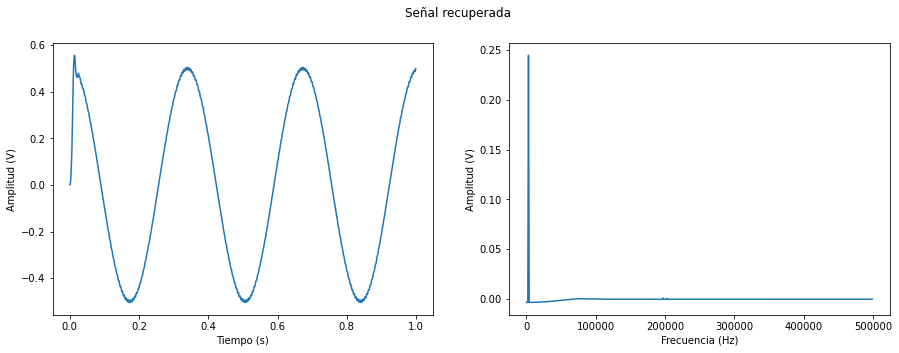

In [34]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de fase de 90° o pi/2

In [35]:
delta_w = 0    #Error de frecuencia en Hz
phase = (3.141592)/2    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


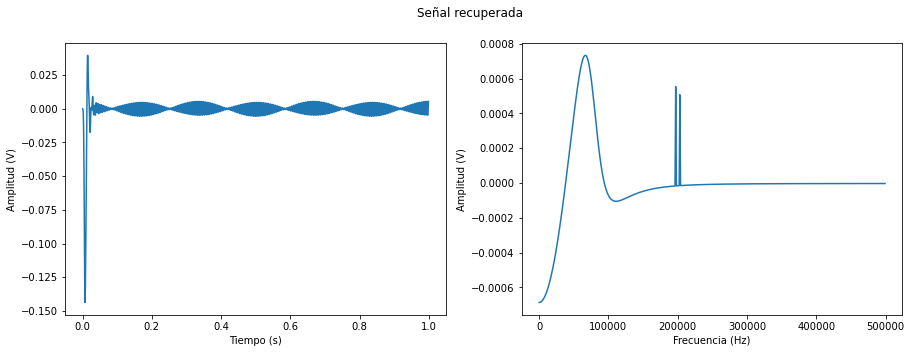

In [36]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de frecuencia de 50 Hz

In [39]:
delta_w = 50    #Error de frecuencia en Hz
phase = 0    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


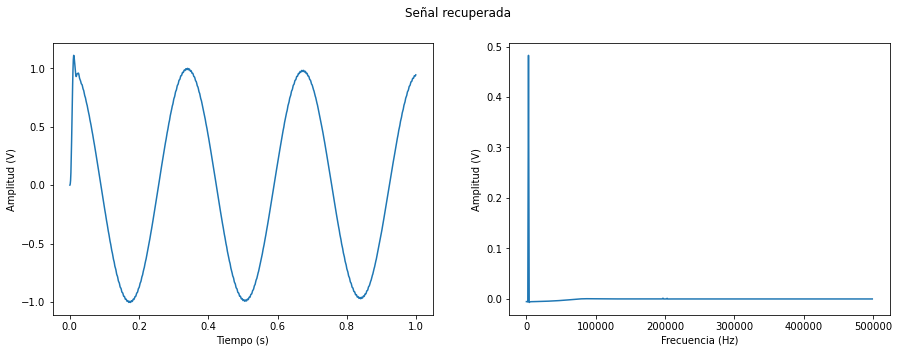

In [40]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de frecuencia de 200 Hz

In [41]:
delta_w = 200    #Error de frecuencia en Hz
phase = 0    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


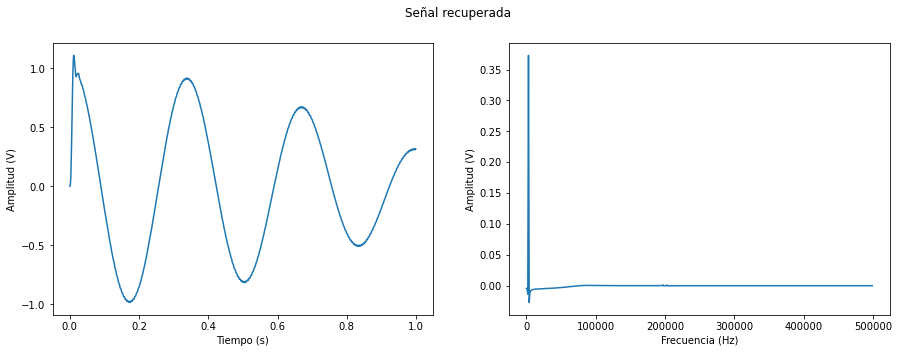

In [42]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de frecuencia de 500 Hz

In [43]:
delta_w = 500    #Error de frecuencia en Hz
phase = 0    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


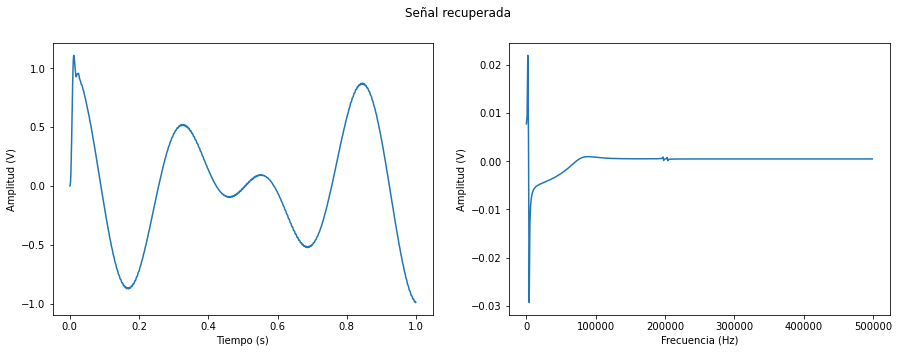

In [44]:
mode = demodulacion_Error(modfe,carr_dem)

### Error de frecuencia de 1000 Hz

In [45]:
delta_w = 1500    #Error de frecuencia en Hz
phase = 0    #Error de fase en radianes
carr_dem = Ac*np.cos(2 * (3.141592) * ((fc+delta_w)/1000) * x+phase) #Onda portadora para demodulacion

C:\Users\Dell\anaconda3\envs\Tareas_IA\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


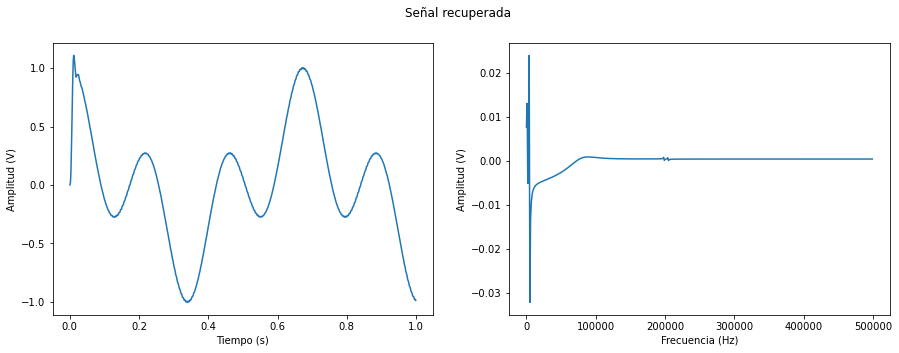

In [46]:
mode = demodulacion_Error(modfe,carr_dem)

### Análisis de resultados

Comenzando por los errores de de fase, estos afectaron la recuperación del mensaje a partir de un valor de aproximadamente 90°. Para valores de 30°, 45° y 60° no se afectó el mensaje recuperado, lo cual es congruente con la teoría pues los errores de fase pequeños no suelen ser muy críticos en el proceso de demodulación. Sobre los errores en frecuencia, a partir de los 200 Hz comenzaron a afectar la recuperación del mensaje, lo cual es un indicador de la importancia de tener osciladores totalmente sincronizados para el proceso de modulación en general. Esto últimos errores se mostraron más críticos, ya que desde valores bajos comezaron a afectar la demodulación.

### Tarea 3

El objetivo de la tarea #3 es construir un modulador básico AM de tipo DSC-LC (Double Side Band, Large Carrier o Gran Portadora). El sistema de modulación AM de Gran Portadora se describe por el siguiente sistema:

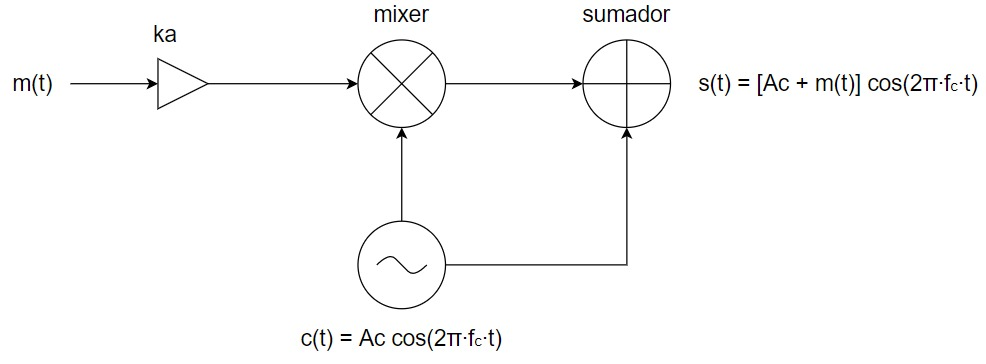

Además, cuando se tiene una señal mensaje con tono, se escribe como un coseno es decir:

<h3 align="center">m(t) = ka∙Am∙cos(2π∙fm∙t)</h3>  

De forma que Am es la amplitud de la señal, fm su frecuencia y ka es la sensibildad de amplitud, la cual permite manipular la modulación.

Entonces la señal modulada será:

<h3 align="center">s(t) = [ka∙Am∙cos(2π∙fm∙t) + 1]∙Ac*cos(2π∙fc∙t)</h3>  

### Gráficas

Como se desea graficar en el dominio del tiempo y de la frecuencia se define la función graficas, la cual recibe un arreglo para el eje X de los gráficos y la señal en función del tiempo y un número del 1 al 3 para agregar el título respectivo al gráfico. La función obtiene la transformada de Fourier y luego, por medio de un subplot, grafica ambas funciones.

In [47]:
def graficas(t,f_t,signal):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,5))                            # Subdivide la figura a mostrar en dos
  
  # if para poner el nombre respectivos a las figuras
  if signal == 1:
    fig.suptitle('Señal moduladora', fontsize='16')
  elif signal == 2:
    fig.suptitle('Señal portadora', fontsize='16')
  elif signal == 3:
    fig.suptitle('Señal modulada', fontsize='16')
  ax1.axhline(linewidth=1, color='grey', linestyle="--")                        # Dibuja el eje X en el subplot 1
  ax1.plot(t,f_t, 'mediumseagreen')                                             # Grafica la función en el dominio del tiempo  en el subplot 1
  ax1.set_xlabel('Tiempo (s)', fontsize='14')                                   # Titula el eje X en el subplot 1
  ax1.set_ylabel('Amplitud', fontsize='14')                                     # Titula el eje Y en el subplot 1

  f_f = scipy.fftpack.fft(f_t)                                                  # Calcula la transformada de fourier
  Mag = abs(f_f)                                                                # Calcula la Magnitud de la FFT
  # Reordenamiento de datos para la graficación
  mag1,mag2 = np.split(Mag, 2)
  Mag=np.concatenate([mag2,mag1])
  F = 1000*np.arange(-len(f_t)/2, len(f_t)/2)/len(f_t)                          # Define el Vector de Frecuencias

  ax2.axvline(linewidth=1, color="grey", linestyle="--")                        # Dibuja el eje Y en el subplot 2
  ax2.plot(F, Mag, 'orange')                                                    # Grafica la función en el dominio de la frecuencia en el subplot 2
  ax2.set_xlabel('Frecuencia (Hz)', fontsize='14')                              # Titula el eje X en el subplot 2
  ax2.set_ylabel('Amplitud', fontsize='14')                                     # Titula el eje Y en el subplot 2

  plt.xticks(np.arange(-500,500, step=50))                                      # Muestra más números en el eje X
  plt.show()

### Modulación

La función modulación recibe como entrada las constantes la amplitud y la frecuencia de la moduladora y la portadora, junto con la sensibilidad de amplitud y el arreglo del tiempo.

In [48]:
def modulacion(ka,Am,Ac,freq_m,freq_c,t):
  mu = ka*Am
  m_t = mu*np.cos(2*np.pi*freq_m*t)                                             # Calcula m(t)
  c_t = Ac*np.cos(2*np.pi *freq_c* t)                                           # Calcula c(t)
  s_t = (1+m_t)*c_t                                                             # Calcula s(t)
  return m_t,c_t,s_t

Se definen las constanstes de las funciones y se llama la función de modulación para obtener las tres señales.

In [49]:
ka = 1
Am = 5
Ac = 2
freq_m = 5
freq_c = 60
t = 0.001*np.arange(0, 1000)
m_t,c_t,s_t = modulacion(ka,Am,Ac,freq_m,freq_c,t)

Una vez con las señales se procede a hacer cada una de las gráficas

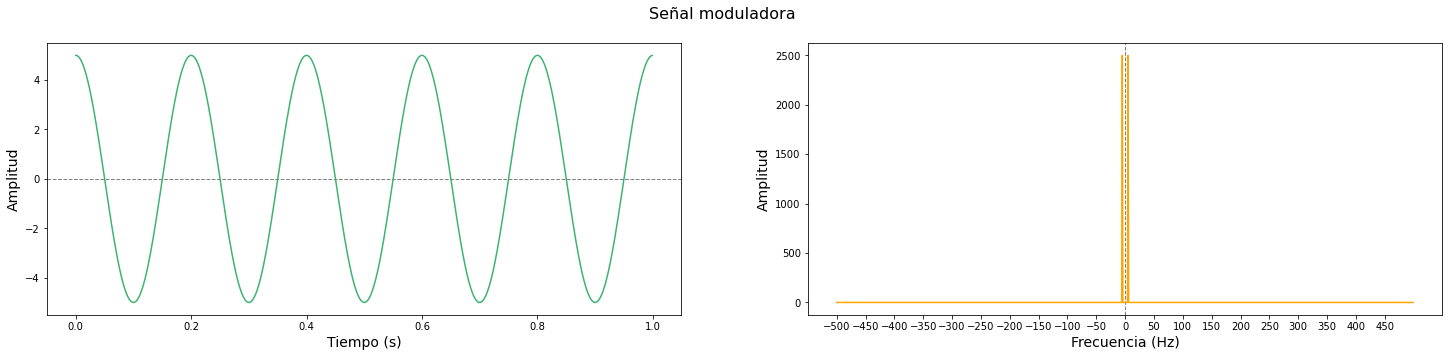

In [50]:
graficas(t,m_t,1)

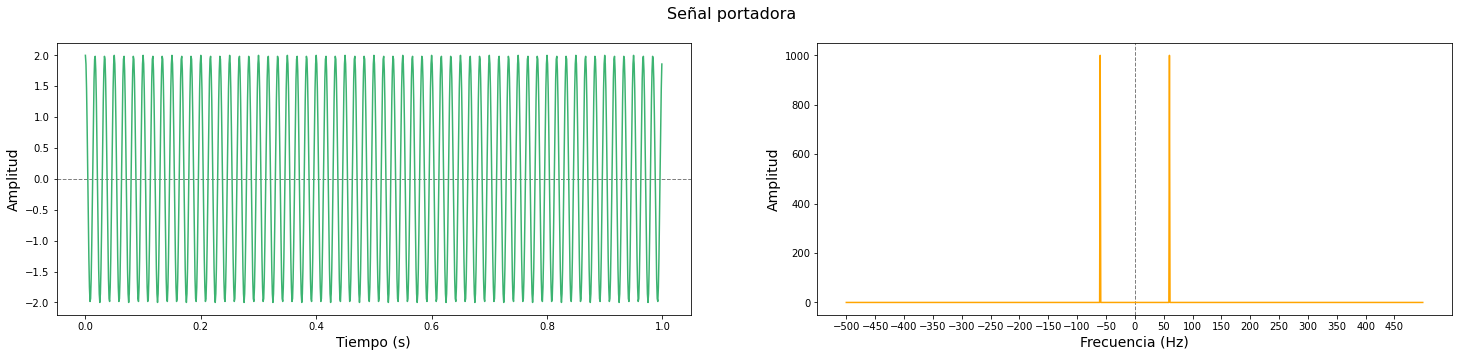

In [51]:
graficas(t,c_t,2)

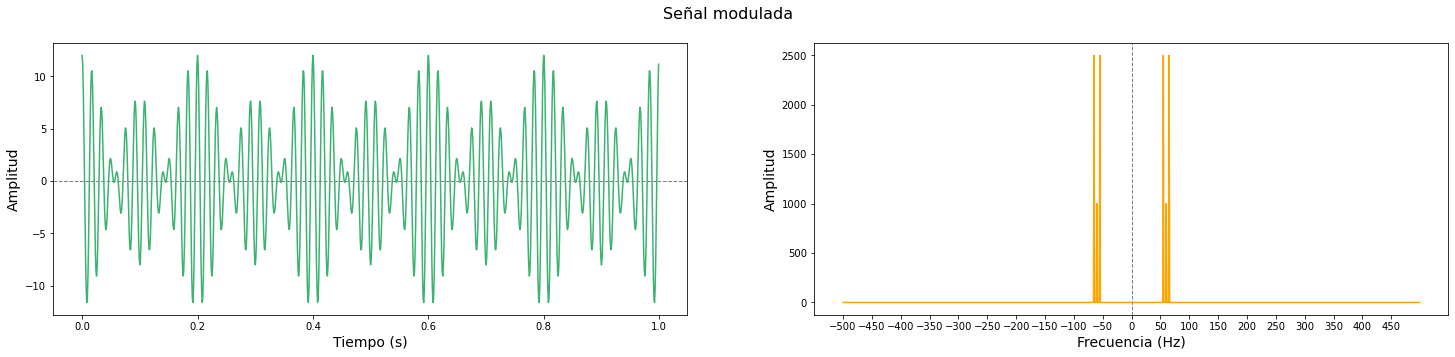

In [52]:
graficas(t,s_t,3)

La gráfica de la señal moduladora muestra que tiene una amplitud de ±5. Esta señal genera sobremodulación, que es cuando el mensaje modulado muestra una inversión de fase, generando la distorción que se muestra en la señal modulada.

Además, la señal moduladora tiene una frecuencia mucho menor que la de la señal portadora, lo cual es fácilmente observable en la cantidad de ciclos que muestran las gráficas en el dominio del tiempo. En el dominio de la frecuencia se puede identificar que para la señal m(f), la frecuencia es bastante pequeña, mientras que la señal c(f) supera los 50 Hz.

Entonces la señal moduladora es multiplicada por la sensibilidad de amplitud, ka. Como, ka se define igual a 1 no hay ningún cambio de la señal y luego se le multiplica la señal portadora, al igual que se hace en la modulación de Portadora Suprimida. La multiplicación se obtiene una señal con la frecuencia de c(t), pero con su amplitud limitada por m(t). Finalmente, al resultado anterior se le suma la señal portadora de forma que se obtiene la modulación Gran Portadora.

La diferencia entre la modulación Portadora Suprimida y Gran portadora, no hay ningún cambio en el dominio del tiempo, es decir, el mensaje enviado es exactamente el mismo. Sin embargo, el dominio de la frecuencia muestra el componenete de la señal portadora.

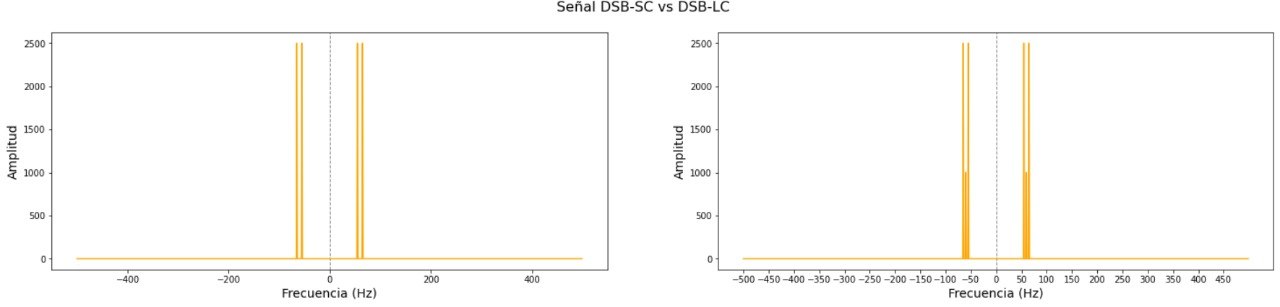

Al enviar información por medio de modulación Gran Portadora requiere un mayor espacio espectral y por lo tanto tiene un mayor gasto energético para el mismo mensaje. Sin embargo, son mucho más económico los receptores de la demodulación.

Una señal sobremodulada es indeseable, pues al momento de hacer la demodulación se perderá la información de los cruces por cero. Para ello existe ka, la sensibilidad de amplitud, esta variable permite modificar la señal para evitar la sobremodulación.

Como la señal de mensaje es una señal con tono, esta señal tiene una amplitud que al multiplicarla por la sensibilidad de amplitud, se obtiene el factor de modulación:

<h3 align="center">μ = ka ∙ Am</h3>  

En el caso anterior, con ka = 1, el factor de modulación era igual a la amplitud. Ahora, se procede a obtener las gráficas con disntintos valores ka.

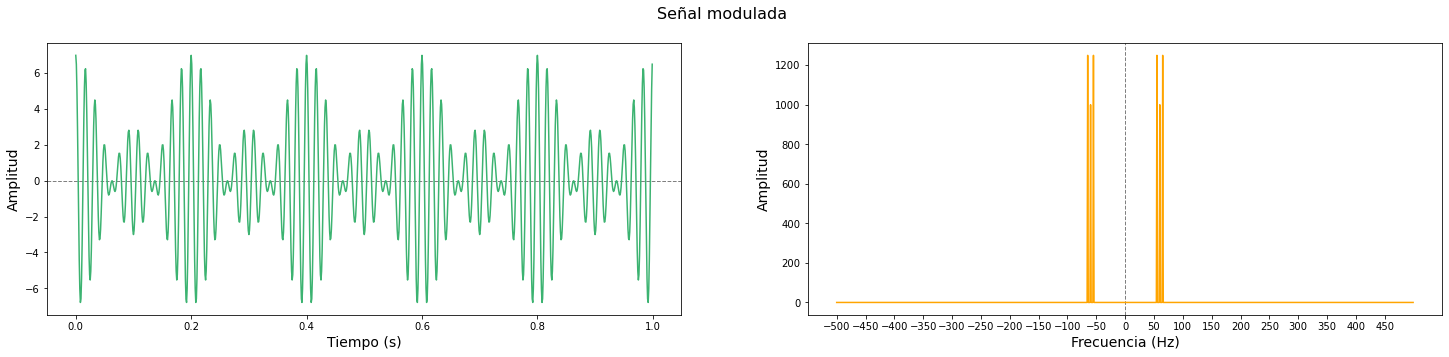

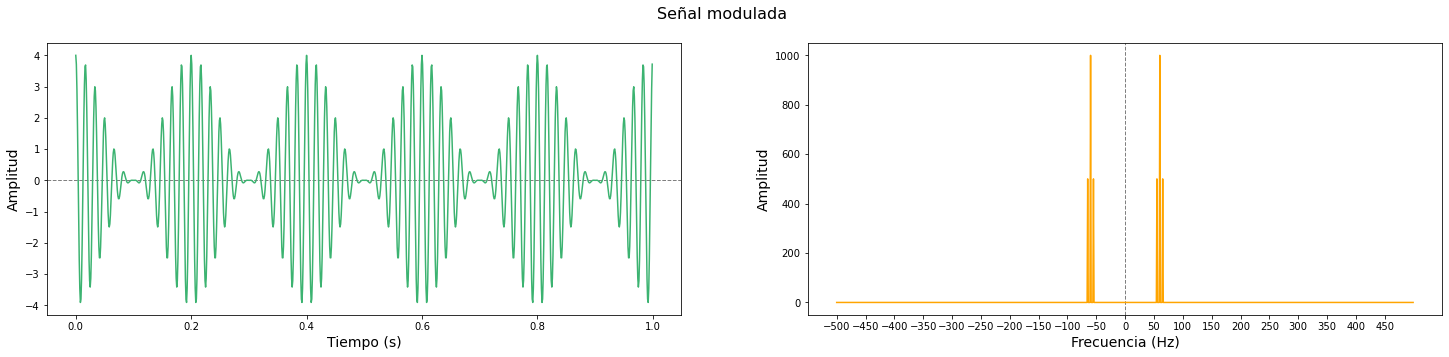

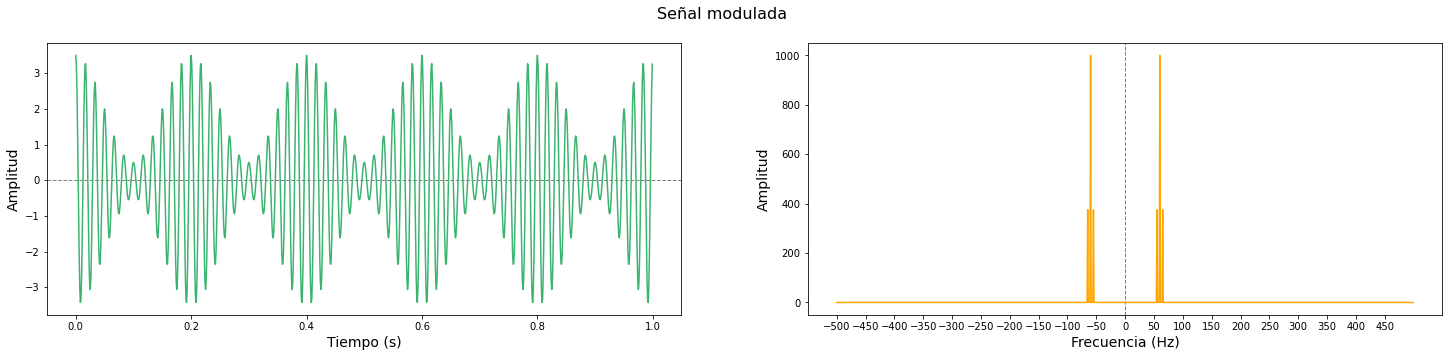

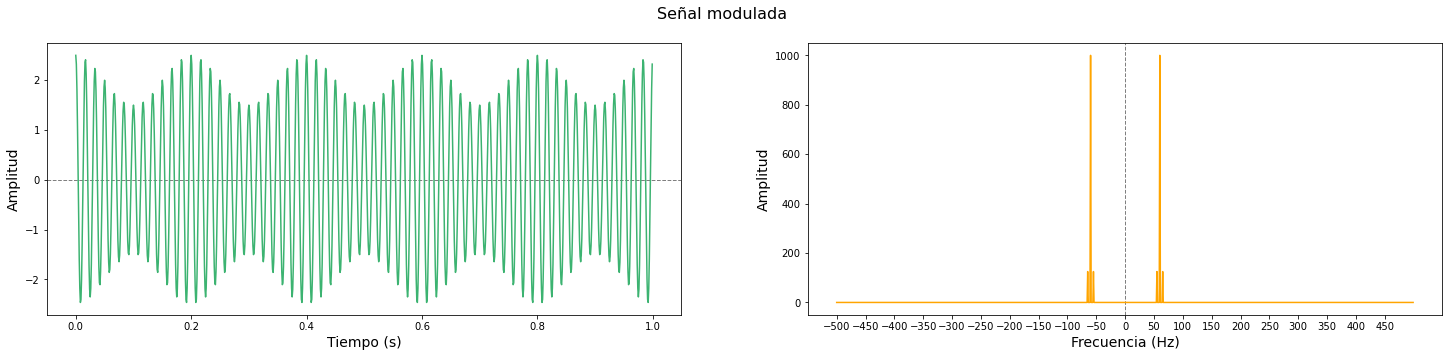

In [53]:
ka1 = 0.5                                                                       # mu = 2.5
ka2 = 0.2                                                                       # mu = 1
ka3 = 0.15                                                                      # mu = 0.75
ka4 = 0.05                                                                      # mu = 0.25
m_t1,c_t1,s_t1 = modulacion(ka1,Am,Ac,freq_m,freq_c,t)
m_t2,c_t2,s_t2 = modulacion(ka2,Am,Ac,freq_m,freq_c,t)
m_t3,c_t3,s_t3 = modulacion(ka3,Am,Ac,freq_m,freq_c,t)
m_t4,c_t4,s_t4 = modulacion(ka4,Am,Ac,freq_m,freq_c,t)

graficas(t,s_t1,3)
graficas(t,s_t2,3)
graficas(t,s_t3,3)
graficas(t,s_t4,3)

Se observa de las gráficas, que conforme más pequeño es ka, hay una menor pronunciación en las envolventes de la señal modulada y, a su vez, se muestra que al amplitud en el dominio del tiempo se va disminuyendo.

Para esta señal moduladora en específico, la cual tiene una amplitud de 5, se puede que concluir que se muestra distorción en el mensaje enviado cuando la sensiblidad de amplitud Ka ≥ 0.2. De lo anterior se observa que se elimina la sobremodulación en la señal modulada cuando μ < 1. Por lo tanto, cuando el factor de modulación sea menor a 1, se podrá corregir el efecto de sobremodulación.